In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [4]:
df['Label'].value_counts()

Label
BENIGN                        1594540
Portscan                       159066
DoS Hulk                       158468
DDoS                            95144
Infiltration - Portscan         71767
DoS GoldenEye                    7567
FTP-Patator                      3972
DoS Slowloris                    3859
SSH-Patator                      2961
DoS Slowhttptest                 1740
Botnet                            736
Web Attack - Brute Force           73
Infiltration                       36
Web Attack - XSS                   18
Web Attack - SQL Injection         13
Heartbleed                         11
Name: count, dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
len(df.columns)

83

In [7]:
df.shape

(2099971, 83)

In [9]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', '

from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])


# 인코딩된 데이터프레임 확인
print(df.head())

In [10]:
df.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label
0,0,119719148,231,0,0,0,0,0,0.000000,0.000000,...,22509459,17,12685486.0,5.296658e+06,20694308,6499982,0,0,0,0
1,17,65511209,6,6,288,288,48,48,48.000000,0.000000,...,1506210,1506210,64004884.0,0.000000e+00,64004884,64004884,0,0,0,0
2,17,113976922,267,0,20447,0,153,37,76.580524,44.140625,...,10983883,14,25498178.0,1.883305e+07,48523116,5463561,0,0,0,0
3,17,67037196,8,8,384,384,48,48,48.000000,0.000000,...,11034681,11034681,55956316.0,0.000000e+00,55956316,55956316,0,0,0,0
4,17,68045057,8,8,384,384,48,48,48.000000,0.000000,...,11043596,11043596,56943904.0,0.000000e+00,56943904,56943904,0,0,0,0


In [11]:
df['Label'].value_counts()

Label
0    1594540
1     505431
Name: count, dtype: int64

누적 분산 비율 (cumulative explained variance):
[0.16371939 0.3074132  0.38043636 0.44485594 0.49759445 0.53683639
 0.57527629 0.61004    0.6378289  0.66231936 0.68490327 0.70568002
 0.72620879 0.74620499 0.76544057 0.78345839 0.79975555 0.81484398
 0.82898651 0.84167016 0.85386554 0.86603261 0.87737997 0.88865574
 0.89958917 0.9100849  0.91935781 0.92821988 0.93638955 0.94309348
 0.94931259 0.95467777 0.95979937 0.96404748 0.96819249 0.972239
 0.97576786 0.97879547 0.98153868 0.98409751]
Label 데이터 타입: int64


/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Gly

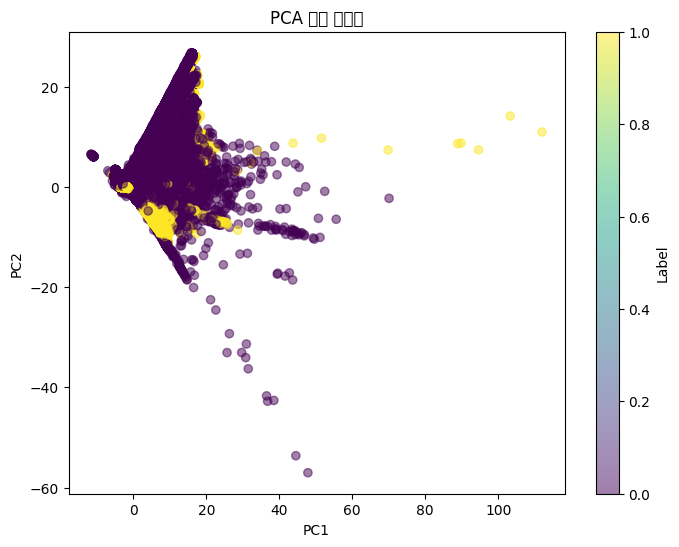

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

tmp = df.drop(labels = 'Label',axis=1)
labels = df['Label']

# 1. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tmp)

# 2. PCA 적용 (주성분 개수 설정)
n_components = 40  # 원하는 차원 수로 설정
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


# 3. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 4. PCA 결과를 DataFrame으로 변환하고 label 병합
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_merged = X_pca_df.assign(label=labels.values)

# 5. 병합된 데이터 타입 확인
print("Label 데이터 타입:", df_merged['label'].dtype)

# 6. 정렬 여부 확인 (필요하면 추가)
# 확인 예시: 병합 전후 `labels` 순서와 `df_merged['label']`이 동일한지 점검
assert np.array_equal(labels.values, df_merged['label'].values), "Label 순서가 일치하지 않습니다."

# 7. PCA 결과 시각화 (2D로 줄인 경우)
import matplotlib.pyplot as plt
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()

In [13]:
# X_pca를 DataFrame으로 변환
X_pca_df = pd.DataFrame(X_pca)

# `assign`으로 label 추가
df_merged = X_pca_df.assign(label=df['Label'].values)

In [14]:
df = df_merged

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,4.111236,3.991998,4.841597,-4.746811,-4.266668,2.462513,-8.581210,14.169295,12.820956,-0.249304,...,-0.196284,0.013608,1.080093,2.133829,-0.188975,-0.472856,0.852014,0.148693,-2.070132,0
1,6.124882,10.214132,-0.513638,0.111736,-0.281314,-1.319487,-3.204819,3.377331,-4.128854,0.314801,...,-0.605452,-0.275907,-0.546762,-0.195685,0.080214,-0.367979,0.256576,0.779018,0.017699,0
2,5.207383,5.588604,7.793452,-6.289842,0.681083,11.282198,-10.783030,3.580506,3.352166,0.257227,...,-0.830713,0.165717,0.536842,2.654735,-0.076050,5.093147,0.202155,-1.051599,-1.616308,0
3,7.298137,9.329390,2.654171,-2.175311,-1.136989,0.090382,-8.784379,11.779914,9.253436,-0.068567,...,-0.085332,-0.313223,-1.777837,-1.593462,0.277109,-0.682840,0.049172,-0.062137,0.190619,0
4,7.425868,9.466596,2.641520,-2.173890,-1.153301,0.072725,-8.815523,11.816480,9.178969,-0.064142,...,-0.087438,-0.314381,-1.774582,-1.594256,0.277250,-0.684160,0.050621,-0.063638,0.181066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099966,-1.811841,-0.006314,0.030601,-0.138961,-2.523130,0.005745,0.406124,-1.154576,0.458118,-0.263731,...,-0.341449,-0.177806,0.041814,-0.176733,0.008714,-0.032713,-0.019097,-0.116469,0.065494,1
2099967,-1.334174,-0.280267,0.128884,-0.442368,-3.180532,-0.087406,0.754742,-1.514106,0.638291,-0.257191,...,0.774361,0.195183,-0.615112,0.082771,0.013248,-0.266216,-0.105211,0.034168,0.294474,1
2099968,-1.804905,-0.006953,0.029783,-0.137271,-2.496622,-0.035099,0.374258,-1.176543,0.468999,-0.250613,...,-0.340060,-0.184058,0.032349,-0.186897,0.009610,-0.035382,-0.021013,-0.118534,0.066535,1
2099969,-2.810244,0.588580,-0.098179,0.475554,0.894810,-0.146829,-0.592490,0.215301,-0.125981,0.005600,...,0.342723,0.113262,0.231273,-0.093490,-0.009382,-0.005185,0.099932,-0.030602,0.025357,0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((1889973, 41), (209998, 41))

In [24]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape

X_test_normal = X_test[X_test['label'] == 0]
X_test_normal.shape

(159227, 41)

In [25]:
y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label',axis=1)

y_test_normal = X_test_normal['label']
X_test_normal = X_test_normal.drop(labels='label',axis=1)

In [26]:
y_test = X_test['label']
X_test = X_test.drop(labels='label', axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normal = scaler.fit_transform(X_train_normal)
X_test = scaler.fit_transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(X_train_normal)
X_test = scaler.fit_transform(X_test)

In [27]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K

latent_dim = 10  # Latent space dimension
inter_dim = 20  # Intermediate dimension for Transformer
num_heads = 4  # Number of attention heads
ff_dim = 64  # Transformer Feedforward Layer dimension
num_classes = 16  # 라벨 개수

# Sampling function for reparameterization trick
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + tf.exp(0.5 * z_log_sigma) * epsilon

# Transformer Encoder Layer
def transformer_encoder(inputs):
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=latent_dim)(inputs, inputs)
    attention_output = layers.Add()([inputs, attention_output])
    attention_output = layers.LayerNormalization()(attention_output)

    ffn = layers.Dense(ff_dim, activation='relu')(attention_output)
    ffn = layers.Dense(inter_dim)(ffn)
    ffn_output = layers.Add()([attention_output, ffn])

    return layers.LayerNormalization()(ffn_output)

# Transformer Decoder Layer
def transformer_decoder(inputs, encoder_output):
    encoder_output = layers.Reshape((1, inter_dim))(encoder_output)

    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=latent_dim)(inputs, encoder_output)
    attention_output = layers.Add()([inputs, attention_output])
    attention_output = layers.LayerNormalization()(attention_output)

    ffn = layers.Dense(ff_dim, activation='relu')(attention_output)
    ffn = layers.Dense(inter_dim)(ffn)
    ffn_output = layers.Add()([attention_output, ffn])

    return layers.LayerNormalization()(ffn_output)

# VAE Loss Function
def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean))
    kl_loss = -0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))
    kl_loss_weighted = kl_loss * 0.0001  # KL Divergence weighting
    return reconstruction_loss + kl_loss_weighted

# Hybrid CVAE Model for 16-Class Classification
def hybrid_cvae(X, labels):
    features = X.shape[1]  # Feature dimension
    input_x = Input(shape=(features,), name='InputFeatures')
    input_label = Input(shape=(1,), name='InputLabel')

    # **One-Hot Encoding 대신 Embedding 사용**
    embedded_label = layers.Embedding(input_dim=num_classes, output_dim=features)(input_label)
    embedded_label = layers.Flatten()(embedded_label)

    # Concatenate input features and labels
    concatenated_input = layers.Concatenate()([input_x, embedded_label])
    reshaped_input = layers.Reshape((features + embedded_label.shape[-1], 1))(concatenated_input)

    # CNN-based Encoder
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)

    # Transformer Encoder
    h = layers.Dense(inter_dim, activation='relu')(h)
    h = layers.Reshape((1, inter_dim))(h)
    h = transformer_encoder(h)
    h = layers.Flatten()(h)

    # Latent Space
    z_mean = layers.Dense(latent_dim)(h)
    z_log_sigma = layers.Dense(latent_dim)(h)
    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

    # Add Label to Latent Space
    z_with_label = layers.Concatenate()([z, embedded_label])

    # Transformer Decoder
    decoder_input = layers.Dense(inter_dim)(z_with_label)
    decoder_input = layers.Reshape((1, inter_dim))(decoder_input)
    decoder_input = transformer_decoder(decoder_input, h)
    decoder_input = layers.Flatten()(decoder_input)

    # CNN-based Decoder
    decoder_output = layers.Dense(features + embedded_label.shape[-1])(decoder_input)
    decoder_output = layers.Reshape((features + embedded_label.shape[-1], 1))(decoder_output)

    decoder_output = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder_output)
    decoder_output = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder_output)
    decoder_output = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder_output)

    decoder_output = layers.Flatten()(decoder_output)
    decoder_output = layers.Dense(features)(decoder_output)

    # **16개 클래스 Softmax 추가**
    class_output = layers.Dense(num_classes, activation='softmax', name='ClassOutput')(decoder_input)

    # Define Model
    model = Model([input_x, input_label], [decoder_output, class_output])
    model.add_loss(vae_loss(input_x, decoder_output, z_mean, z_log_sigma))

    return model

# Create Hybrid Model
model = hybrid_cvae(X_train_normal, y_train_normal)
model.summary()

# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Compile and Train the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss={'ClassOutput': 'sparse_categorical_crossentropy'},  # 다중 분류를 위해 loss 추가
    metrics={'ClassOutput': 'accuracy'}
)

history = model.fit(
    [X_train_normal, y_train_normal], {'ClassOutput': y_train_normal, 'OutputFeatures': X_train_normal},
    shuffle=True,
    epochs=50,
    validation_split=0.1,
    batch_size=32,
    callbacks=[early_stopping]
).history

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLabel (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 40)        80          ['InputLabel[0][0]']             
                                                                                                  
 InputFeatures (InputLayer)     [(None, 40)]         0           []                               
                                                                                                  
 flatten_8 (Flatten)            (None, 40)           0           ['embedding_2[0][0]']            
                                                                                            

Epoch 1/50
40369/40369 [==============================] - 440s 11ms/step - loss: 0.3604 - accuracy: 0.8420 - val_loss: 0.1695 - val_accuracy: 0.7718
Epoch 2/50
40369/40369 [==============================] - 466s 12ms/step - loss: 0.2332 - accuracy: 0.8705 - val_loss: 0.1354 - val_accuracy: 0.8416
Epoch 3/50
40369/40369 [==============================] - 465s 12ms/step - loss: 0.1780 - accuracy: 0.8837 - val_loss: 0.1047 - val_accuracy: 0.9209
Epoch 4/50
40369/40369 [==============================] - 468s 12ms/step - loss: 0.1660 - accuracy: 0.8883 - val_loss: 0.1145 - val_accuracy: 0.8676
Epoch 5/50
40369/40369 [==============================] - 486s 12ms/step - loss: 0.1427 - accuracy: 0.8981 - val_loss: 0.0795 - val_accuracy: 0.9127
Epoch 6/50
40369/40369 [==============================] - 476s 12ms/step - loss: 0.1284 - accuracy: 0.9005 - val_loss: 0.0600 - val_accuracy: 0.9383
Epoch 7/50
40369/40369 [==============================] - 413s 10ms/step - loss: 0.1233 - accuracy: 0.9048

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

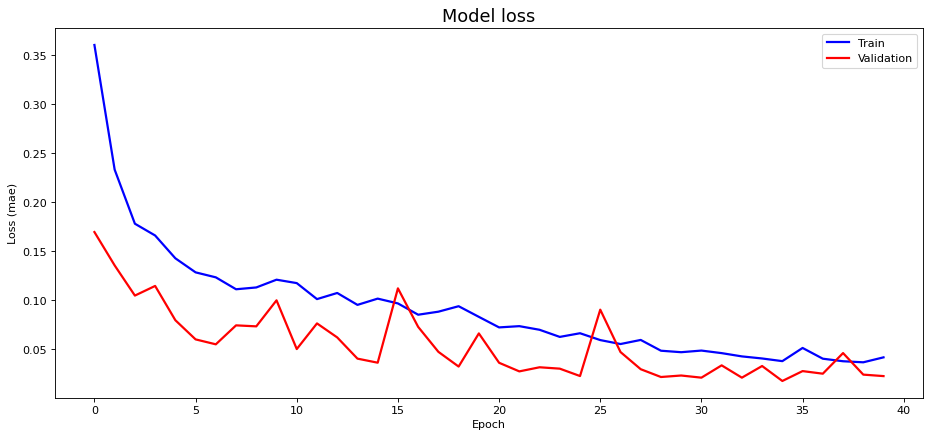

In [32]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [33]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [34]:
X_test.shape

(209998, 40)

In [35]:
valid_x_predictions = model.predict([X_test, y_test])
#mse = np.mean(np.power(flatten(test_X_selected) - flatten(valid_x_predictions), 2), axis=1)

mse = np.mean(np.power(X_test - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

6563/6563 [==============================] - 18s 3ms/step


In [36]:
error_df

,reconstruction_error,true_class
464355,0.000291,0
660360,0.148236,1
1411149,0.009530,0
2022900,0.000058,0
672693,0.023476,0
...,...,...
1950767,0.001358,0
80839,0.000196,0
1027788,0.000194,0
1805988,0.000258,0


In [37]:
error_df['true_class'].value_counts()

true_class
0    159227
1     50771
Name: count, dtype: int64

/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_99114/349485020.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


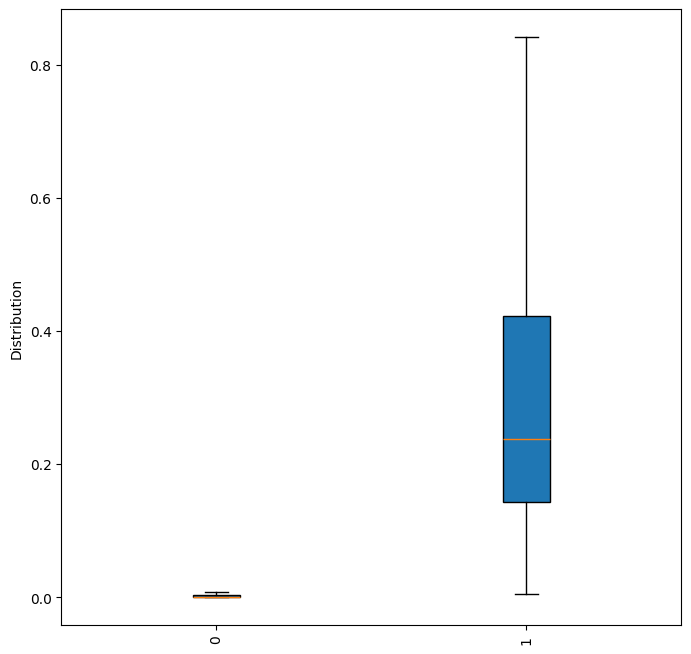

In [38]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [39]:
print(error_df)

         reconstruction_error  true_class
464355               0.000291           0
660360               0.148236           1
1411149              0.009530           0
2022900              0.000058           0
672693               0.023476           0
...                       ...         ...
1950767              0.001358           0
80839                0.000196           0
1027788              0.000194           0
1805988              0.000258           0
1460707              0.000606           0

[209998 rows x 2 columns]


In [40]:
print(error_df[(error_df['reconstruction_error'] >= 0.001) & (error_df['true_class'] == 0)].count())

reconstruction_error    61687
true_class              61687
dtype: int64


In [41]:
print(error_df[(error_df['reconstruction_error'] < 3) & (error_df['true_class'] == 1)].count())

reconstruction_error    50612
true_class              50612
dtype: int64


Best threshold: 0.1
Best F1 score: 0.9750858690919646


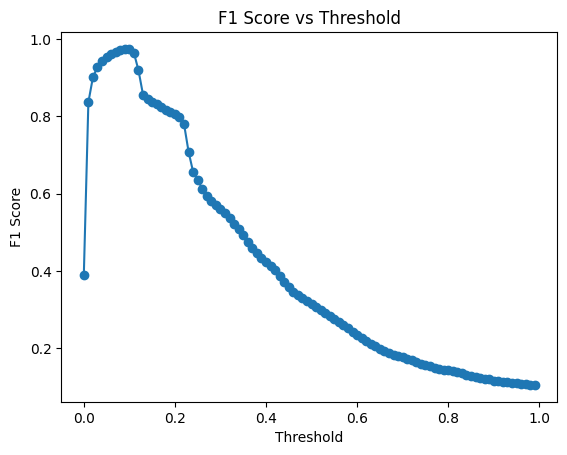

In [42]:


import numpy as np
from sklearn.metrics import f1_score

# Define the range of threshold values
threshold_range = np.arange(0, 1, 0.01)

# List to store F1 scores for each threshold
f1_scores = []

# Loop through each threshold and calculate F1 score
for threshold in threshold_range:
    y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
    f1 = f1_score(error_df.true_class, y_pred)
    f1_scores.append(f1)

# Find the threshold with the highest F1 score
best_threshold = threshold_range[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")

# Optionally, you can plot the F1 scores across the threshold range
plt.plot(threshold_range, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.show()


In [43]:
# 그래프 보고 threshold 결정 0.35
threshold = best_threshold

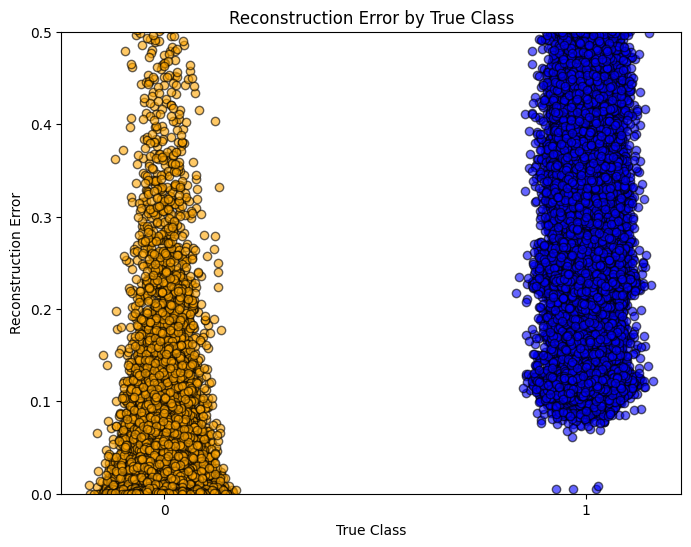

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes with a specified y-axis limit
plt.figure(figsize=(8, 6))

# Add jitter to avoid overlapping points in the scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Jitter for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Jitter for class 1

# Create the scatter plot
plt.scatter(x_0, true_class_0, color='orange', alpha=0.6, edgecolor='black', label='Class 0')
plt.scatter(x_1, true_class_1, color='blue', alpha=0.6, edgecolor='black', label='Class 1')

# Set y-axis limit
plt.ylim(0, 0.5)

# Set x-axis labels and adjust ticks
plt.xticks([1, 2], ['0', '1'])
plt.xlabel('True Class')

# Set y-axis label and title
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error by True Class')

# Display the plot
plt.show()


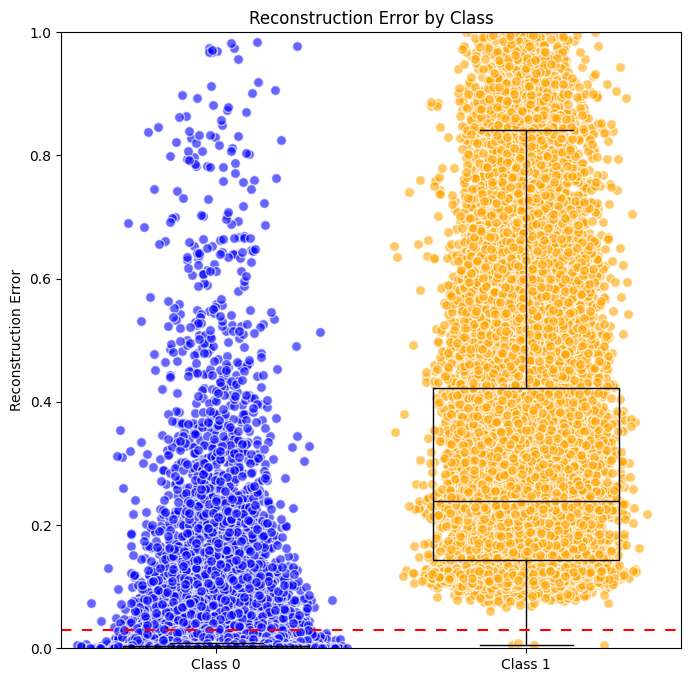

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a swarm plot equivalent using scatter plot with more jitter
x_0 = np.random.normal(1, 0.1, size=len(true_class_0))  # Increased jitter for class 0
x_1 = np.random.normal(2, 0.1, size=len(true_class_1))  # Increased jitter for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showfliers=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black'))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
ax.axhline(y=0.03, xmin=0.0, xmax=1, dashes=(5, 5), color='red')

# Adjust y-axis limit to make sure the threshold line is visible
#ax.set_ylim(bottom=min(min(true_class_0), min(true_class_1)) - 0.01, 
#           top=max(max(true_class_0), max(true_class_1)) + 0.01)
ax.set_ylim(bottom=0, top=1)
    
# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


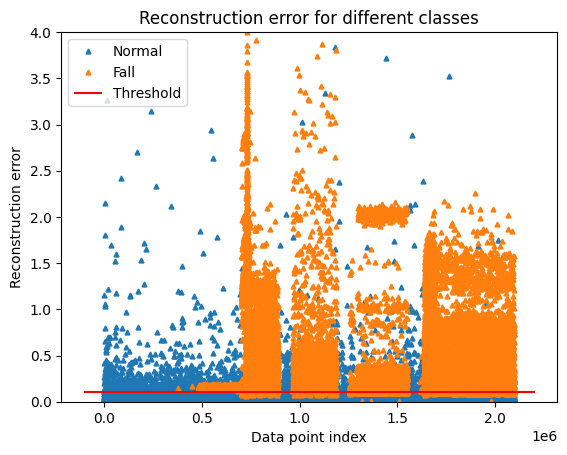

In [46]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.set_ylim(0, 4)
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

<Figure size 1200x1200 with 0 Axes>

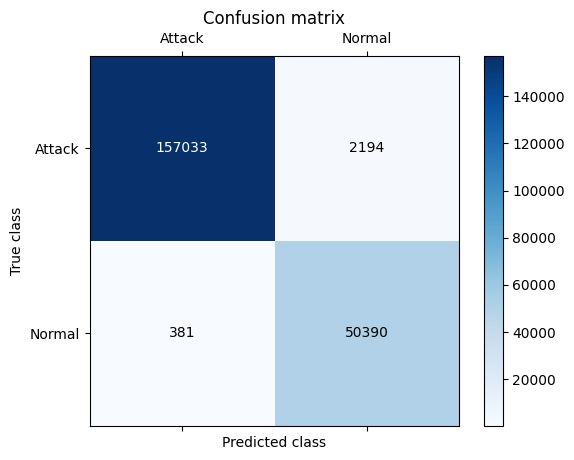

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already defined LABELS, threshold, and y_pred

LABELS = ["Attack", "Normal"]

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Create the figure and axis
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()

# Plot the confusion matrix using imshow
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Add color bar
plt.colorbar(cax)

# Set the labels for the axes
ax.set_xticks(np.arange(len(LABELS)))
ax.set_yticks(np.arange(len(LABELS)))

ax.set_xticklabels(LABELS)
ax.set_yticklabels(LABELS)

# Set labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')

# Annotate the confusion matrix with the counts
for i in range(len(LABELS)):
    for j in range(len(LABELS)):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [48]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9877379784569377
Precision : 0.9582762817587098
Recall : 0.9924957160583798
F1 : 0.9750858690919646


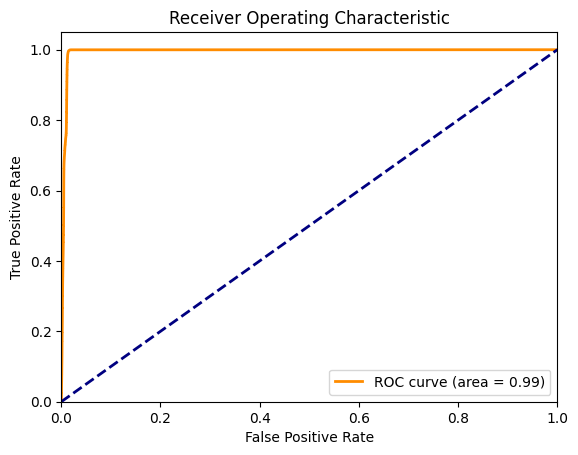

In [49]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and reconstruction_error have been defined
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


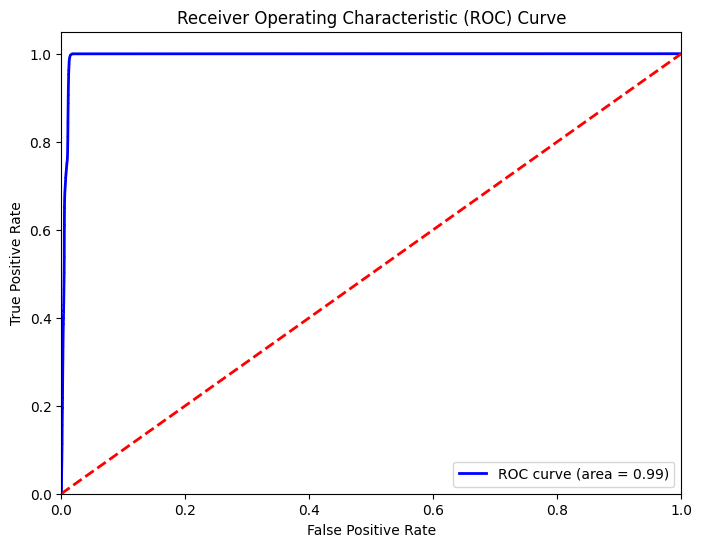

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the true labels and reconstruction errors from error_df
y_true = error_df['true_class']
y_scores = error_df['reconstruction_error']

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Display the plot
plt.show()


In [51]:
print(f"ROC Score : {roc_auc}")

ROC Score : 0.994656607525678


In [52]:
# If error_df.true_class is a nested structure, flatten it
y_test = error_df.true_class.apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x))

# Ensure y_pred is a list of integers
y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]

# Now calculate the metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy Score: 0.9877379784569377
Precision: 0.9582762817587098
Recall: 0.9924957160583798
F1 Score: 0.9750858690919646
